In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.float_format = "{:.5f}".format
pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv("../data/df_features.csv", index_col=0)

In [3]:
display(df.head())
print("df shape:", df.shape)

,smiles,homolumogap,number_of_atoms,number_of_atoms_except_H,number_of_bonds,number_of_heavy_bonds,number_of_conformations,number_of_heavy_atoms,exact_mol_weight,average_mol_weight,heavy_mol_weight,number_of_radical_electrons,number_of_valence_electrons,fp_morgan_density_1,fp_morgan_density_2,fp_morgan_density_3,max_absolute_partial_charge,min_absolute_partial_charge,max_partial_charge,min_partial_charge,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
0,O=C1[N]c2ccncc2[CH][C@@H]1c1ccc(cc1)C,3.04768,30,18,32,20,0,18,236.09496,236.27400,224.17800,2,88,1.11111,1.88889,2.66667,0.27186,0.25392,0.25392,-0.27186,0,15,2,1,0,0,0,0,0,0
1,COc1cc(OC)ccc1/C=C/N(C(=O)C)C,4.41097,34,17,34,17,0,17,235.12084,235.28300,218.14700,0,92,1.29412,2.00000,2.52941,0.49662,0.22263,0.22263,-0.49662,0,13,1,3,0,0,0,0,0,0
2,C=CCN(C(=O)C)/C=C/c1ccccc1C,4.63954,33,16,33,16,0,16,215.13101,215.29600,198.16000,0,84,1.43750,2.12500,2.68750,0.31550,0.22318,0.22318,-0.31550,0,14,1,1,0,0,0,0,0,0
3,C=CCN(C(=O)C)/C=C/c1ccccc1F,4.49260,30,16,30,16,0,16,219.10594,219.25900,205.14700,0,84,1.50000,2.18750,2.75000,0.31550,0.22318,0.22318,-0.31550,0,13,1,1,1,0,0,0,0,0
4,C=CCN(C(=O)C)/C=C/c1ccccc1Cl,4.61233,30,16,30,16,0,16,235.07639,235.71400,221.60200,0,84,1.50000,2.18750,2.75000,0.31550,0.22318,0.22318,-0.31550,0,13,1,1,0,0,0,0,1,0


df shape: (3452151, 30)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3452151 entries, 0 to 3452150
Data columns (total 30 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   smiles                       object 
 1   homolumogap                  float64
 2   number_of_atoms              int64  
 3   number_of_atoms_except_H     int64  
 4   number_of_bonds              int64  
 5   number_of_heavy_bonds        int64  
 6   number_of_conformations      int64  
 7   number_of_heavy_atoms        int64  
 8   exact_mol_weight             float64
 9   average_mol_weight           float64
 10  heavy_mol_weight             float64
 11  number_of_radical_electrons  int64  
 12  number_of_valence_electrons  int64  
 13  fp_morgan_density_1          float64
 14  fp_morgan_density_2          float64
 15  fp_morgan_density_3          float64
 16  max_absolute_partial_charge  float64
 17  min_absolute_partial_charge  float64
 18  max_partial_charge           float64
 19  

In [5]:
df.describe()

,homolumogap,number_of_atoms,number_of_atoms_except_H,number_of_bonds,number_of_heavy_bonds,number_of_conformations,number_of_heavy_atoms,exact_mol_weight,average_mol_weight,heavy_mol_weight,number_of_radical_electrons,number_of_valence_electrons,fp_morgan_density_1,fp_morgan_density_2,fp_morgan_density_3,max_absolute_partial_charge,min_absolute_partial_charge,max_partial_charge,min_partial_charge,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
count,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3449533.00000,3449533.00000,3449533.00000,3449533.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000,3452151.00000
mean,5.68425,29.45426,14.12519,29.86861,14.53954,0.00000,14.12518,201.68624,201.88684,186.43513,0.16954,77.58138,1.38697,2.08338,2.63120,0.40008,0.19241,0.19483,-0.39717,0.00525,10.52305,1.67369,1.48037,0.16526,0.00996,0.01214,0.15085,0.09293,0.01099
std,1.16461,6.94438,2.50094,7.06498,2.95070,0.00000,2.50094,32.20185,32.23970,30.56837,0.61056,13.25157,0.22079,0.27397,0.34576,0.09037,0.10740,0.11301,0.09119,0.07892,2.67514,1.30234,1.24231,0.60240,0.11031,0.12004,0.39517,0.33649,0.10549
min,0.37552,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,8.00521,8.00600,8.00600,0.00000,4.00000,0.10000,0.15000,0.20000,0.00000,0.00000,-0.41151,-0.74022,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,4.90349,25.00000,13.00000,25.00000,13.00000,0.00000,13.00000,184.04841,184.19500,168.18000,0.00000,70.00000,1.25000,1.92857,2.43750,0.33625,0.11515,0.11523,-0.48077,0.00000,9.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,5.57833,30.00000,15.00000,30.00000,15.00000,0.00000,15.00000,208.15756,208.33000,192.13300,0.00000,80.00000,1.40000,2.11111,2.66667,0.39460,0.18441,0.18480,-0.39332,0.00000,11.00000,2.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,6.36746,34.00000,16.00000,35.00000,17.00000,0.00000,16.00000,225.15446,225.36100,210.17100,0.00000,88.00000,1.53333,2.27273,2.87500,0.48095,0.28648,0.29228,-0.33045,0.00000,12.00000,2.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
max,47.02399,106.00000,51.00000,105.00000,59.00000,0.00000,51.00000,665.15869,665.66100,642.47700,18.00000,244.00000,2.00000,3.00000,3.75000,1.00672,0.59137,1.00672,0.03794,14.00000,42.00000,17.00000,15.00000,18.00000,7.00000,7.00000,6.00000,9.00000,5.00000


In [6]:
#number_of_conformations column has only 0 values
print("number_of_conformations values:", df["number_of_conformations"].unique())

df = df.drop("number_of_conformations", axis=1)

number_of_conformations values: [0]


In [7]:
# Verifying NaN values
df.isna().sum()

smiles                            0
homolumogap                       0
number_of_atoms                   0
number_of_atoms_except_H          0
number_of_bonds                   0
number_of_heavy_bonds             0
number_of_heavy_atoms             0
exact_mol_weight                  0
average_mol_weight                0
heavy_mol_weight                  0
number_of_radical_electrons       0
number_of_valence_electrons       0
fp_morgan_density_1               0
fp_morgan_density_2               0
fp_morgan_density_3               0
max_absolute_partial_charge    2618
min_absolute_partial_charge    2618
max_partial_charge             2618
min_partial_charge             2618
number_of_B_atoms                 0
number_of_C_atoms                 0
number_of_N_atoms                 0
number_of_O_atoms                 0
number_of_F_atoms                 0
number_of_Si_atoms                0
number_of_P_atoms                 0
number_of_S_atoms                 0
number_of_Cl_atoms          

In [8]:
# Drop rows with NaN values
df = df.dropna(axis=0)

df.isna().sum()

smiles                         0
homolumogap                    0
number_of_atoms                0
number_of_atoms_except_H       0
number_of_bonds                0
number_of_heavy_bonds          0
number_of_heavy_atoms          0
exact_mol_weight               0
average_mol_weight             0
heavy_mol_weight               0
number_of_radical_electrons    0
number_of_valence_electrons    0
fp_morgan_density_1            0
fp_morgan_density_2            0
fp_morgan_density_3            0
max_absolute_partial_charge    0
min_absolute_partial_charge    0
max_partial_charge             0
min_partial_charge             0
number_of_B_atoms              0
number_of_C_atoms              0
number_of_N_atoms              0
number_of_O_atoms              0
number_of_F_atoms              0
number_of_Si_atoms             0
number_of_P_atoms              0
number_of_S_atoms              0
number_of_Cl_atoms             0
number_of_Br_atoms             0
dtype: int64

In [9]:
#Two features ('number_of_atoms_except_H' and 'number_of_heavy_atoms') are pretty similar, except for 7 rows.
display(df[(df["number_of_atoms_except_H"] != df["number_of_heavy_atoms"])][["number_of_atoms_except_H", "number_of_heavy_atoms"]])

df = df.drop("number_of_atoms_except_H", axis=1)

print("Remaining columns:", list(df.columns))

,number_of_atoms_except_H,number_of_heavy_atoms
140686,18,16
1652244,11,8
1761811,20,18
1894228,12,9
3250062,18,16
3284202,18,16
3330645,18,16


Remaining columns: ['smiles', 'homolumogap', 'number_of_atoms', 'number_of_bonds', 'number_of_heavy_bonds', 'number_of_heavy_atoms', 'exact_mol_weight', 'average_mol_weight', 'heavy_mol_weight', 'number_of_radical_electrons', 'number_of_valence_electrons', 'fp_morgan_density_1', 'fp_morgan_density_2', 'fp_morgan_density_3', 'max_absolute_partial_charge', 'min_absolute_partial_charge', 'max_partial_charge', 'min_partial_charge', 'number_of_B_atoms', 'number_of_C_atoms', 'number_of_N_atoms', 'number_of_O_atoms', 'number_of_F_atoms', 'number_of_Si_atoms', 'number_of_P_atoms', 'number_of_S_atoms', 'number_of_Cl_atoms', 'number_of_Br_atoms']


In [ ]:
df.to_csv("../data/df_clean.csv")

,homolumogap,number_of_atoms,number_of_bonds,number_of_heavy_bonds,number_of_heavy_atoms,exact_mol_weight,average_mol_weight,heavy_mol_weight,number_of_radical_electrons,number_of_valence_electrons,fp_morgan_density_1,fp_morgan_density_2,fp_morgan_density_3,max_absolute_partial_charge,min_absolute_partial_charge,max_partial_charge,min_partial_charge,number_of_B_atoms,number_of_C_atoms,number_of_N_atoms,number_of_O_atoms,number_of_F_atoms,number_of_Si_atoms,number_of_P_atoms,number_of_S_atoms,number_of_Cl_atoms,number_of_Br_atoms
homolumogap,1.00000,0.25794,0.21521,-0.31517,-0.26352,-0.22928,-0.22962,-0.32291,-0.24249,-0.04800,-0.05254,-0.16922,-0.29377,-0.07627,-0.18926,-0.17637,0.08793,-0.00500,-0.10792,-0.23377,-0.02198,0.03883,0.05532,0.05289,-0.13181,-0.05802,-0.01790
number_of_atoms,0.25794,1.00000,0.99354,0.62088,0.70283,0.63619,0.63432,0.49805,-0.12836,0.84588,-0.36734,-0.28290,-0.11916,-0.00844,-0.26016,-0.27343,-0.02221,-0.03861,0.80020,0.04283,-0.11705,-0.18306,0.00962,-0.07680,-0.19590,-0.23555,-0.14710
number_of_bonds,0.21521,0.99354,1.00000,0.68471,0.74193,0.66434,0.66246,0.53243,-0.12031,0.86211,-0.38893,-0.27274,-0.07807,-0.01720,-0.26914,-0.28279,-0.01488,-0.03939,0.83732,0.06615,-0.13883,-0.18726,-0.00029,-0.08545,-0.19470,-0.23642,-0.15014
number_of_heavy_bonds,-0.31517,0.62088,0.68471,1.00000,0.96974,0.88081,0.87937,0.86525,-0.01997,0.88091,-0.37085,-0.14625,0.16480,0.14125,0.05356,0.04240,-0.15563,-0.02843,0.82541,0.24928,0.02320,-0.01140,-0.07837,-0.11612,-0.12803,-0.12030,-0.13795
number_of_heavy_atoms,-0.26352,0.70283,0.74193,0.96974,1.00000,0.92919,0.92762,0.89988,-0.04016,0.95291,-0.35890,-0.18770,0.08403,0.19184,0.10110,0.08962,-0.20328,-0.02949,0.83061,0.22617,0.09455,0.00722,-0.06494,-0.10889,-0.14506,-0.12817,-0.14712
exact_mol_weight,-0.22928,0.63619,0.66434,0.88081,0.92919,1.00000,0.99998,0.98562,-0.04839,0.91450,-0.30157,-0.17390,0.05079,0.17117,0.13444,0.13148,-0.17115,-0.03388,0.70223,0.18051,0.11383,0.06091,-0.01061,-0.03425,0.04336,0.05089,0.04341
average_mol_weight,-0.22962,0.63432,0.66246,0.87937,0.92762,0.99998,1.00000,0.98593,-0.04844,0.91280,-0.30111,-0.17366,0.05073,0.17009,0.13378,0.13087,-0.17006,-0.03438,0.70088,0.17970,0.11281,0.06060,-0.01023,-0.03430,0.04408,0.05565,0.04639
heavy_mol_weight,-0.32291,0.49805,0.53243,0.86525,0.89988,0.98562,0.98593,1.00000,-0.02503,0.84763,-0.26308,-0.13387,0.08770,0.19712,0.20896,0.20798,-0.19103,-0.02986,0.62450,0.19836,0.15355,0.10640,-0.01834,-0.02756,0.07938,0.10204,0.07047
number_of_radical_electrons,-0.24249,-0.12836,-0.12031,-0.01997,-0.04016,-0.04839,-0.04844,-0.02503,1.00000,-0.08251,0.06167,0.08201,0.08333,-0.10245,0.01942,0.01954,0.10296,0.01662,-0.11140,0.20088,-0.05245,-0.02963,0.02292,0.01872,0.04304,-0.01138,-0.00597
number_of_valence_electrons,-0.04800,0.84588,0.86211,0.88091,0.95291,0.91450,0.91280,0.84763,-0.08251,1.00000,-0.34310,-0.22632,-0.00787,0.19329,0.06665,0.05828,-0.20195,-0.03888,0.80141,0.17201,0.12242,0.01453,-0.04427,-0.08814,-0.15670,-0.14853,-0.15339


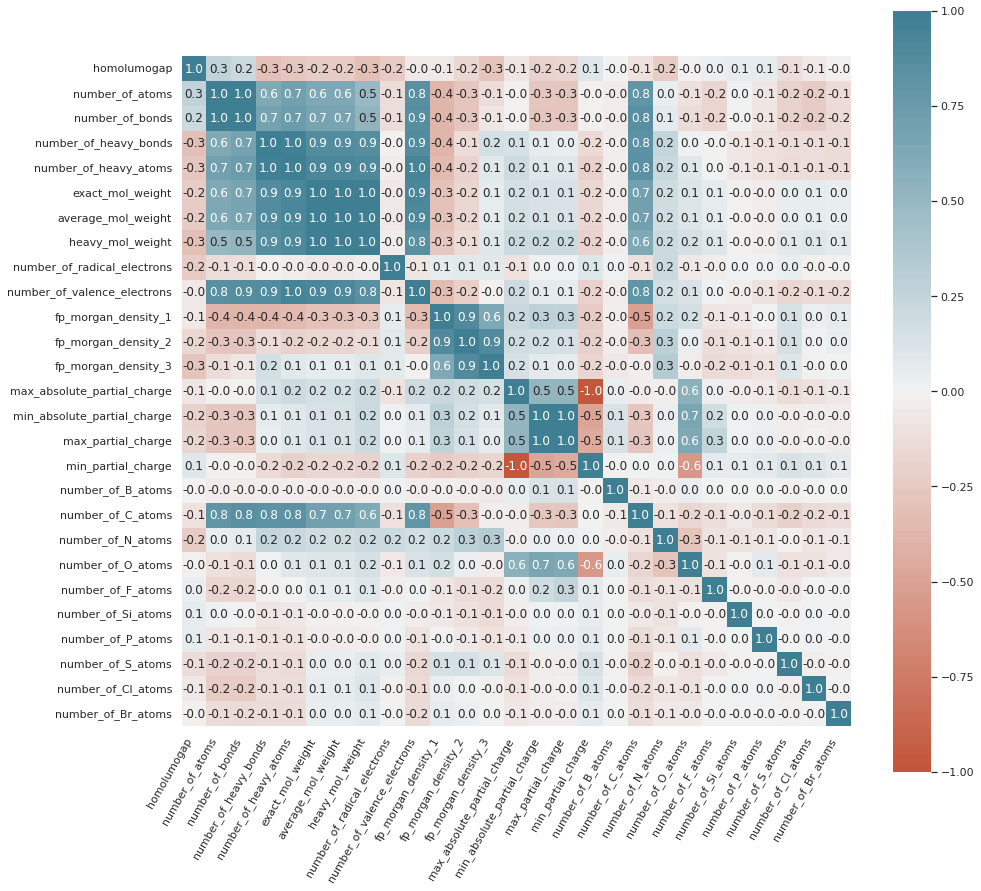

In [10]:
corr = df.corr()
display(corr)

fig, ax = plt.subplots(figsize=(15, 14))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200), square=True, 
            annot=True, fmt=".1f", 
            ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, horizontalalignment="right")
plt.show()

In [11]:
features = list(df.columns[2:])
target = list(df.columns[1:2])

print(f"{len(features)} features: {features}\n")
print(f"{len(target)} target: {target}")

26 features: ['number_of_atoms', 'number_of_bonds', 'number_of_heavy_bonds', 'number_of_heavy_atoms', 'exact_mol_weight', 'average_mol_weight', 'heavy_mol_weight', 'number_of_radical_electrons', 'number_of_valence_electrons', 'fp_morgan_density_1', 'fp_morgan_density_2', 'fp_morgan_density_3', 'max_absolute_partial_charge', 'min_absolute_partial_charge', 'max_partial_charge', 'min_partial_charge', 'number_of_B_atoms', 'number_of_C_atoms', 'number_of_N_atoms', 'number_of_O_atoms', 'number_of_F_atoms', 'number_of_Si_atoms', 'number_of_P_atoms', 'number_of_S_atoms', 'number_of_Cl_atoms', 'number_of_Br_atoms']

1 target: ['homolumogap']


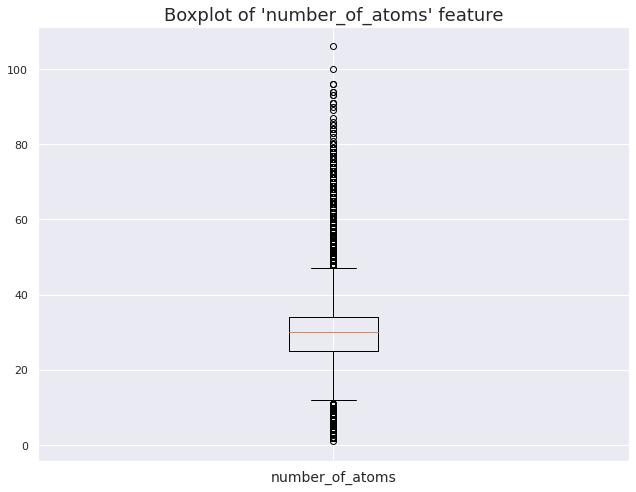

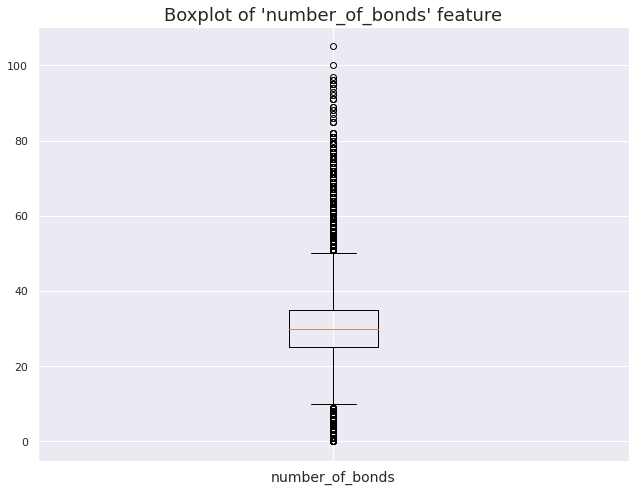

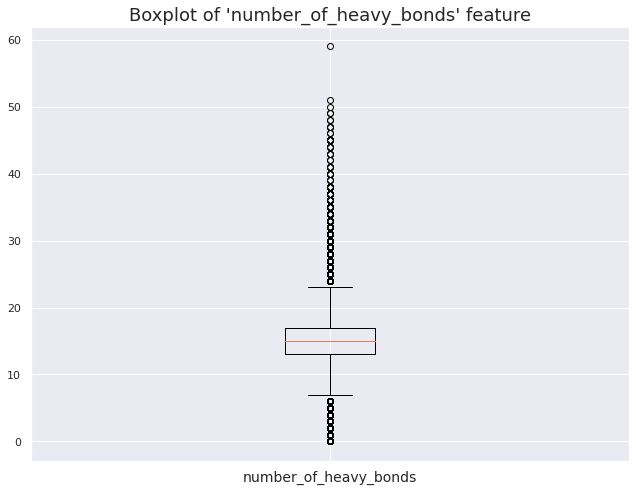

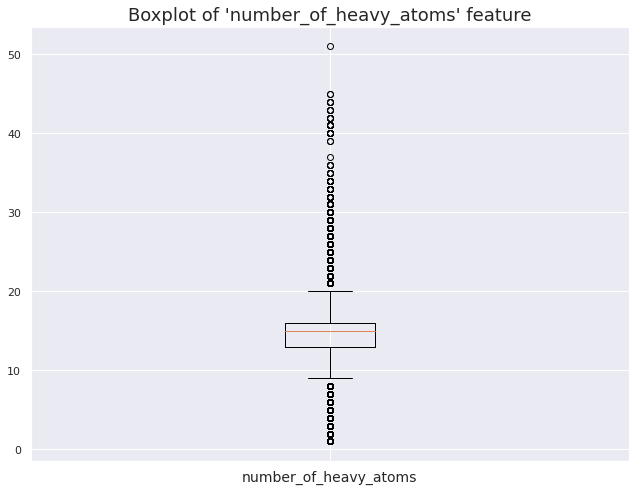

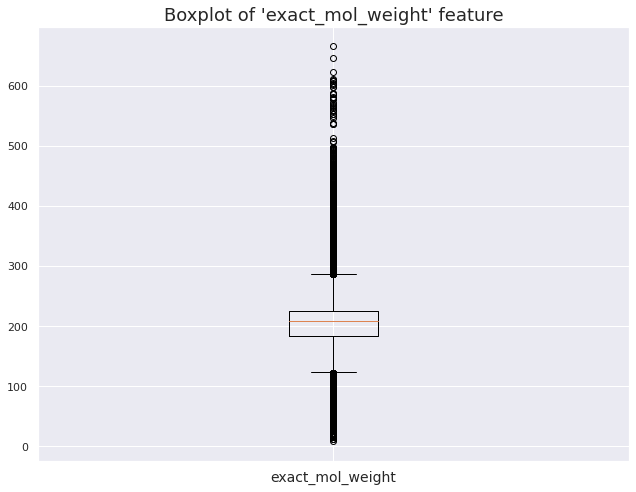

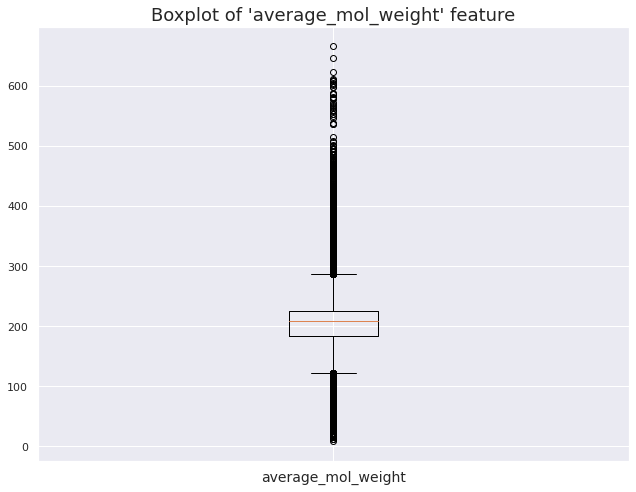

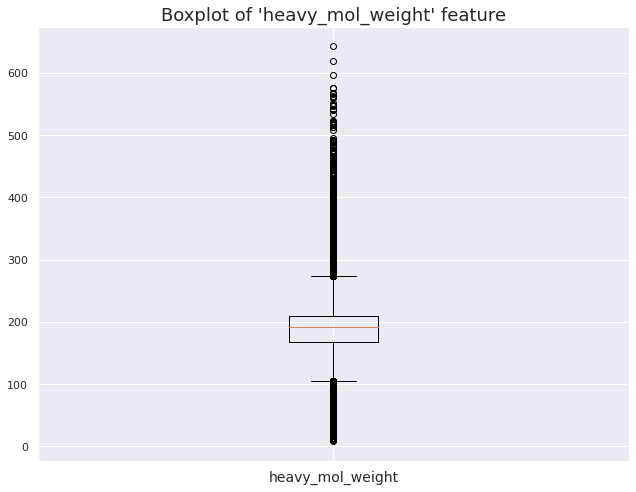

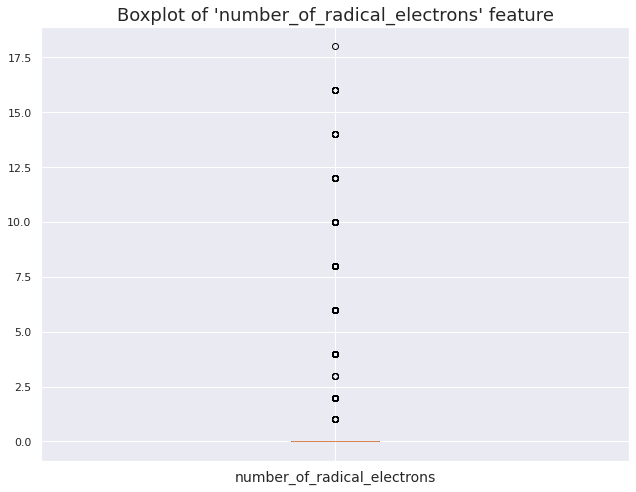

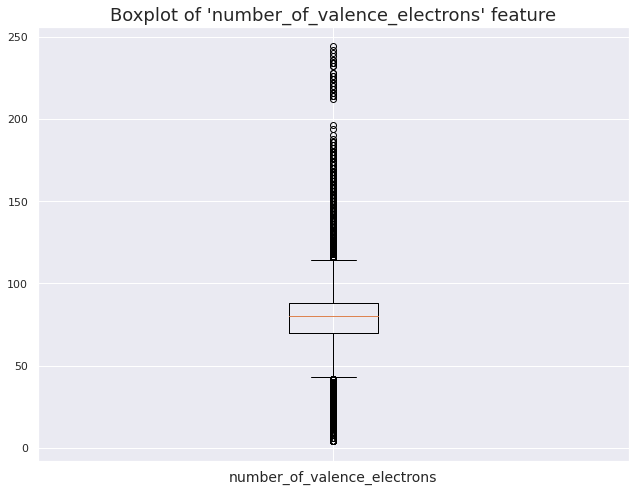

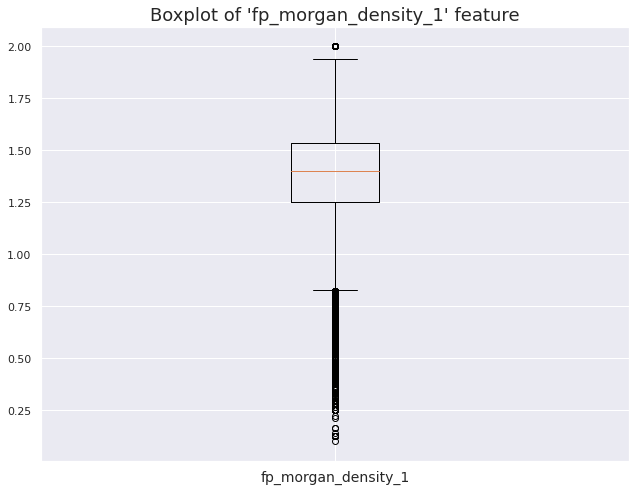

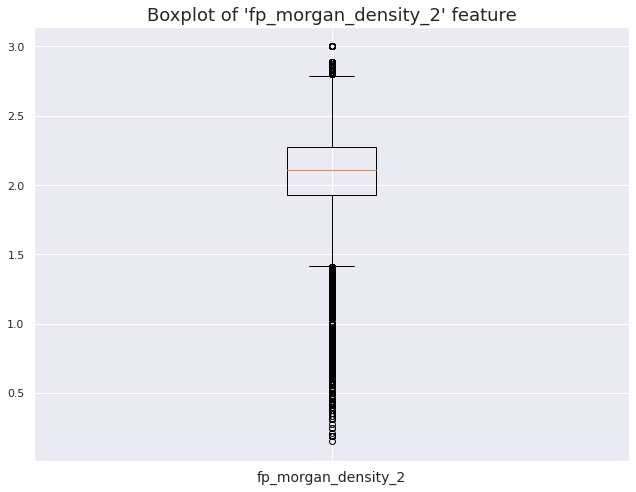

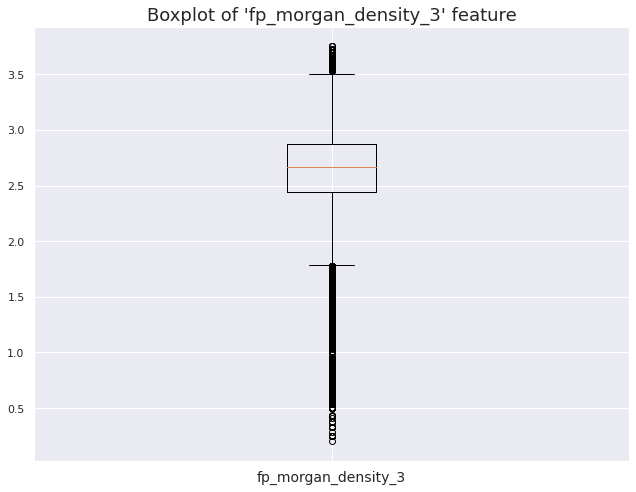

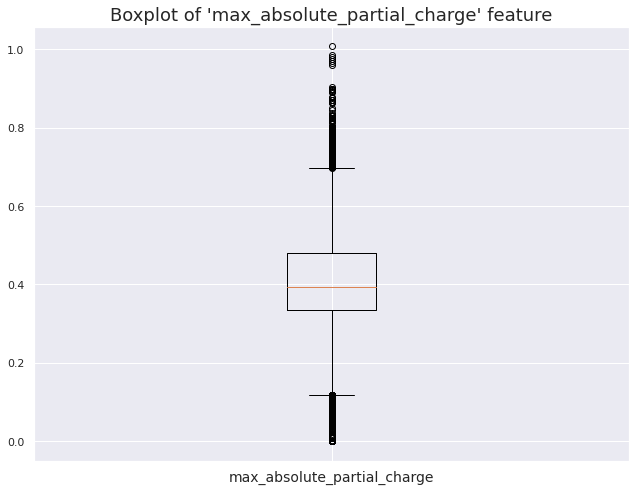

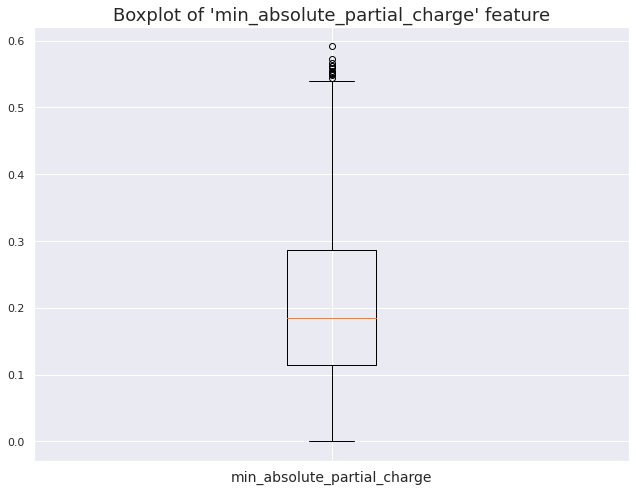

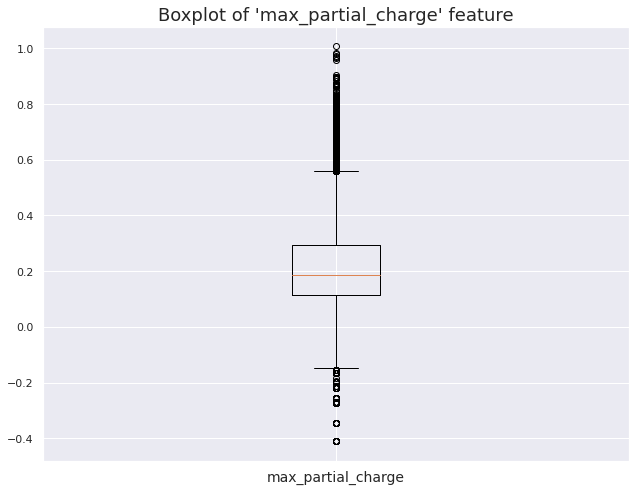

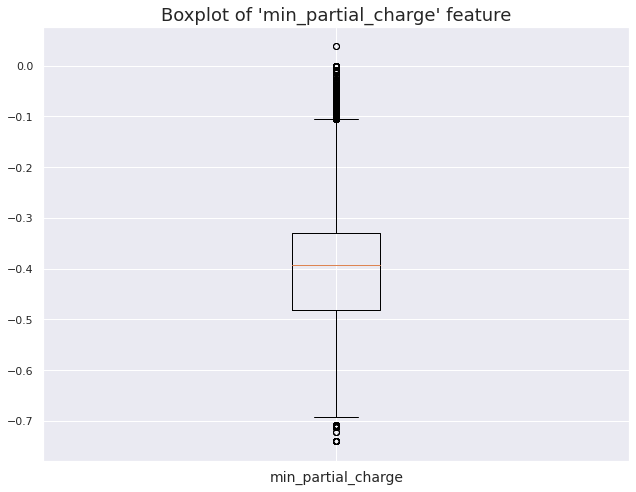

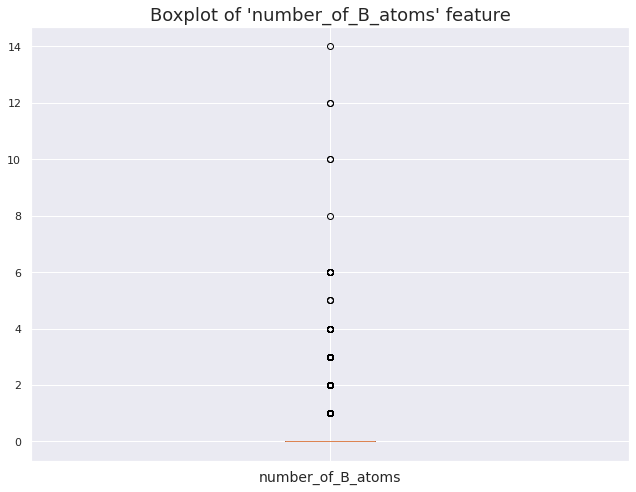

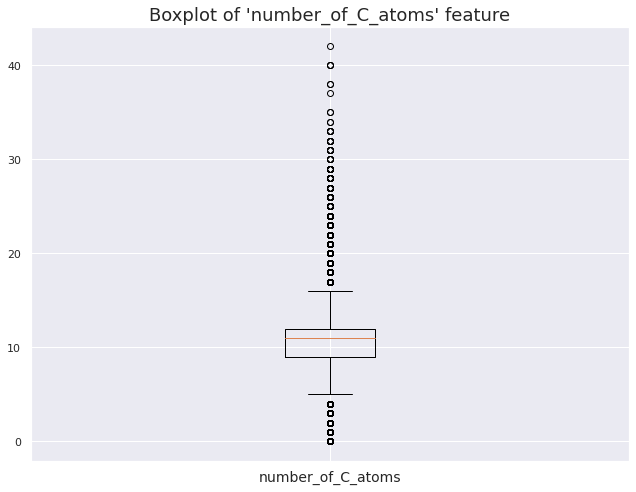

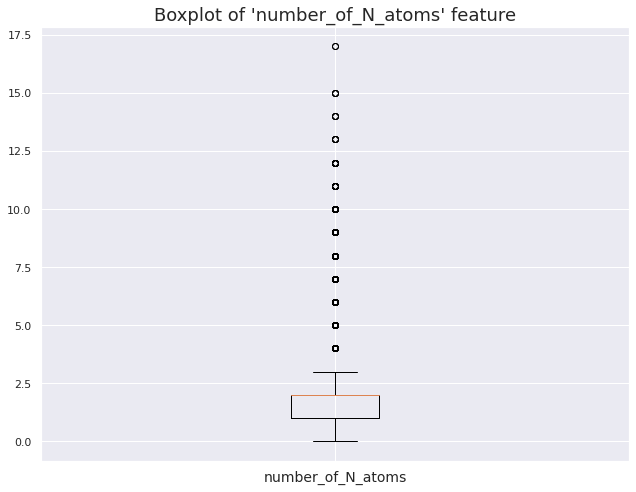

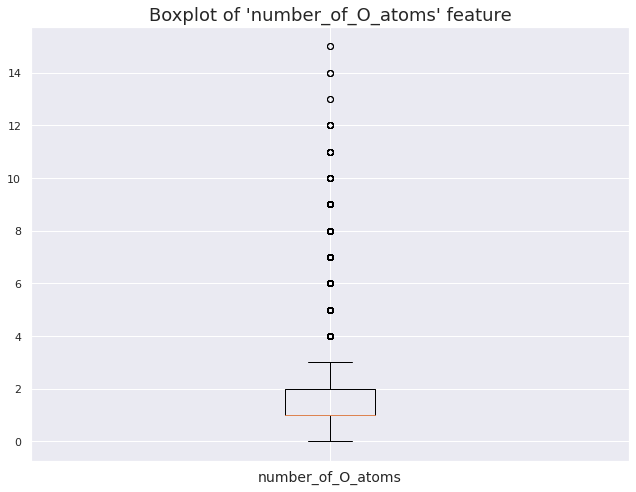

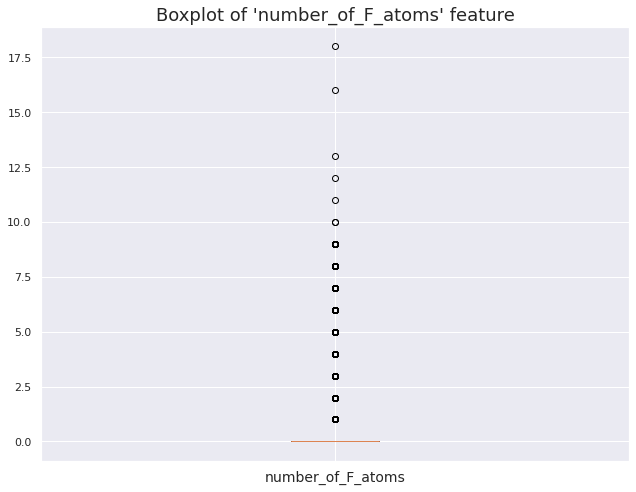

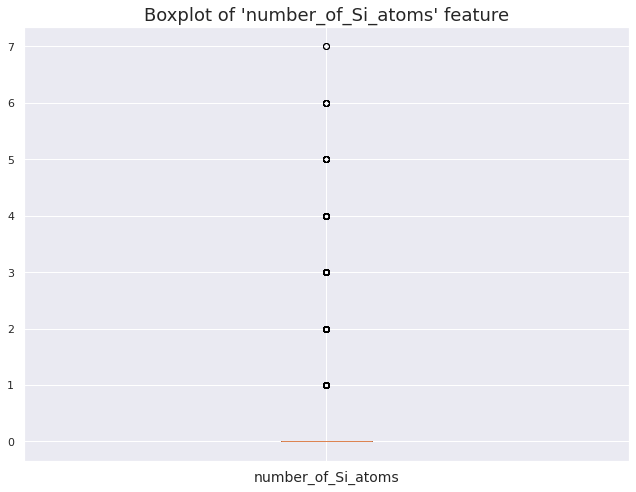

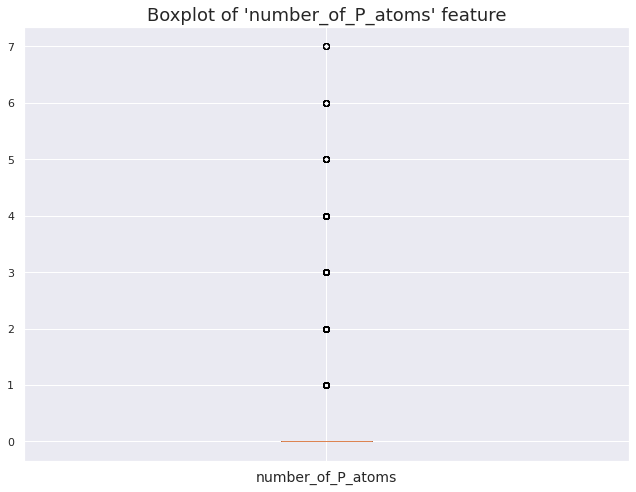

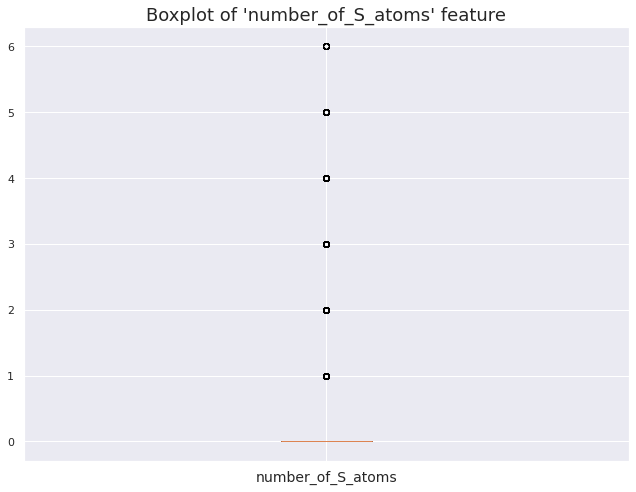

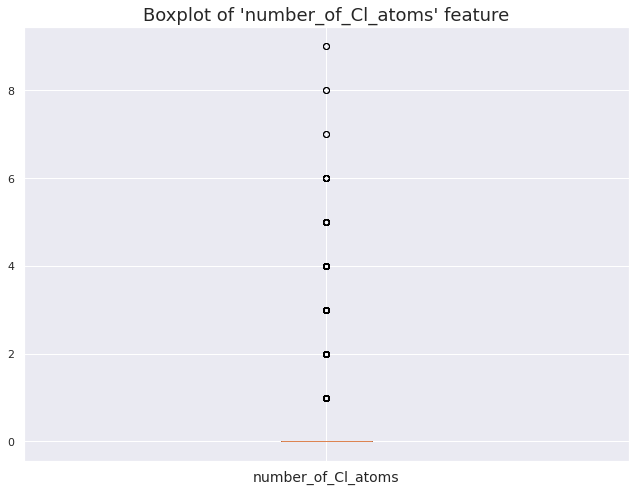

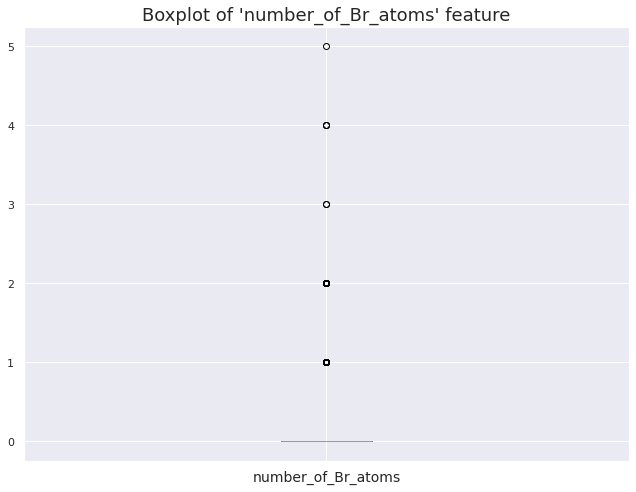

In [12]:
# BOXPLOTS
for feature in features:
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.boxplot(df[feature])
    ax.set_title(f"Boxplot of '{feature}' feature", fontsize=18)
    ax.set_xticklabels([feature], fontsize=14)
    fig.tight_layout()
    plt.show()

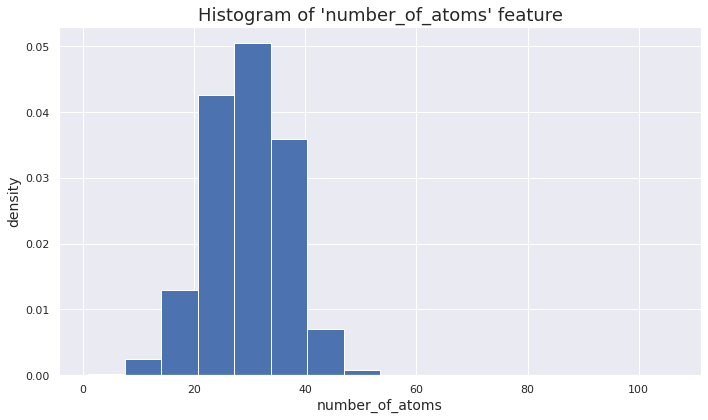

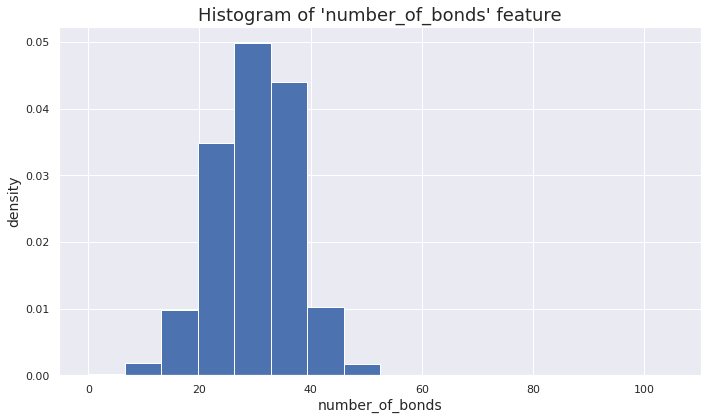

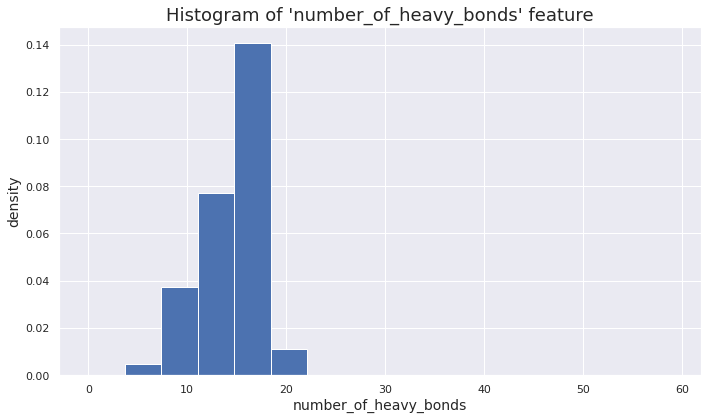

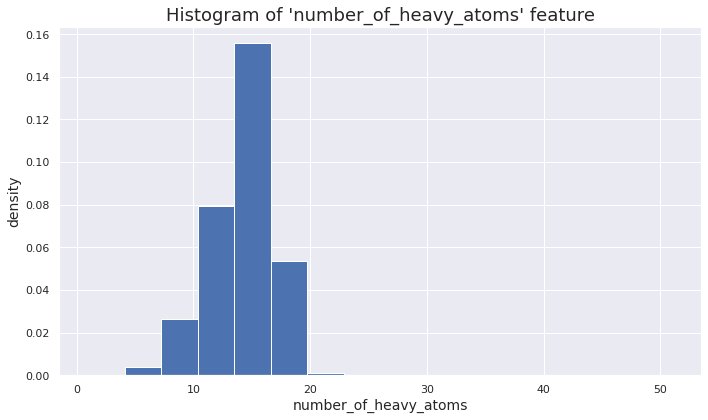

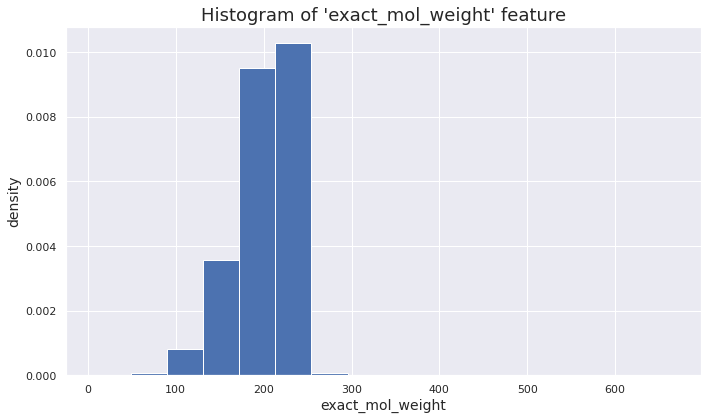

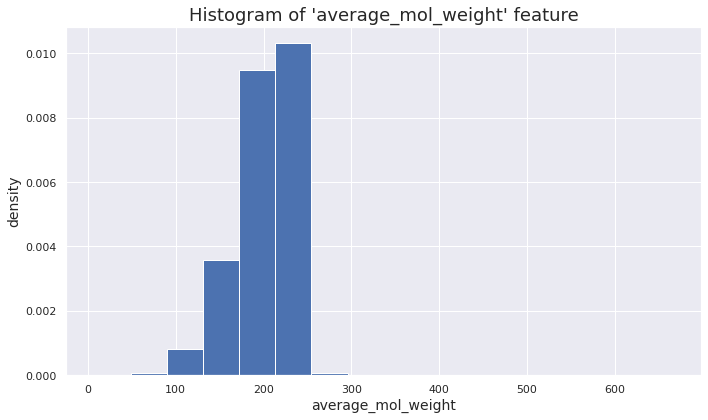

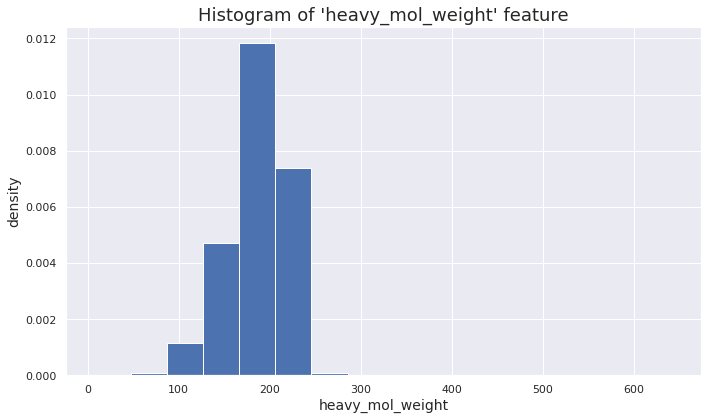

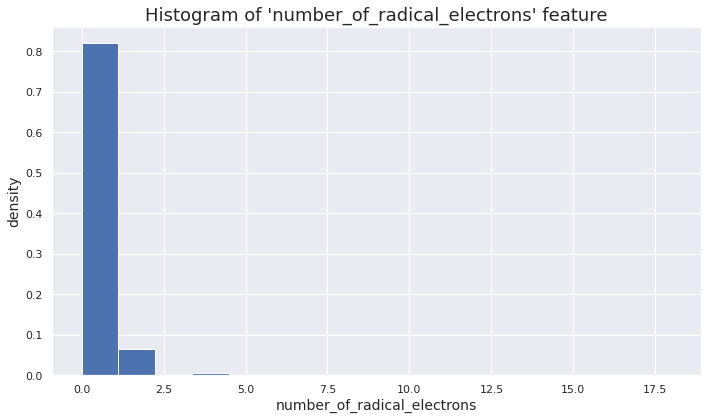

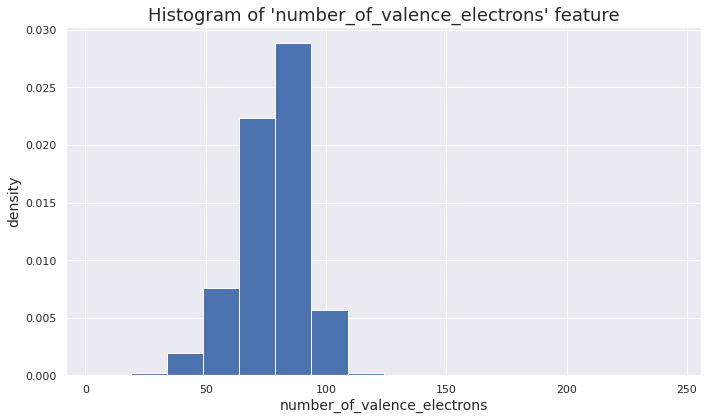

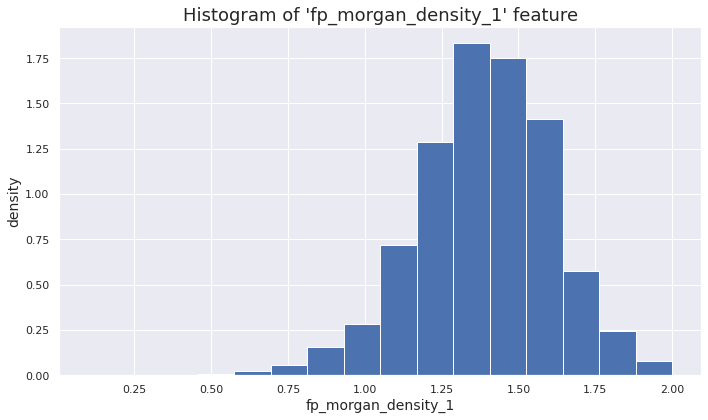

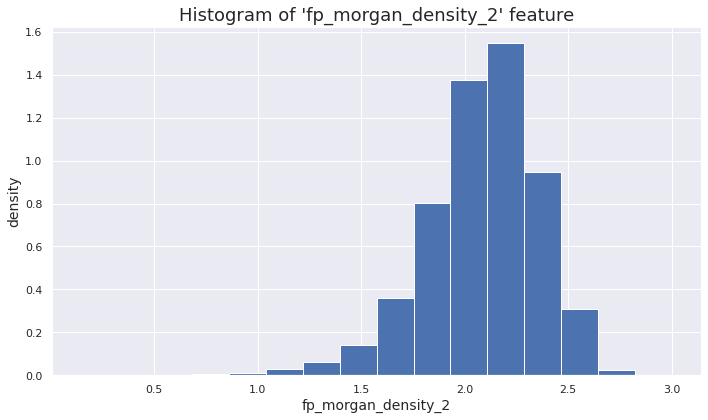

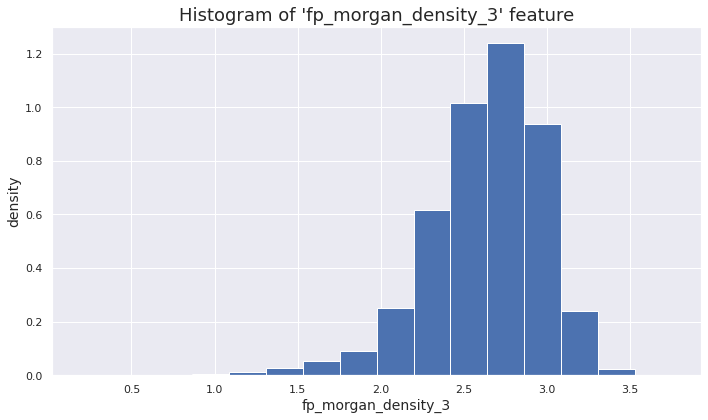

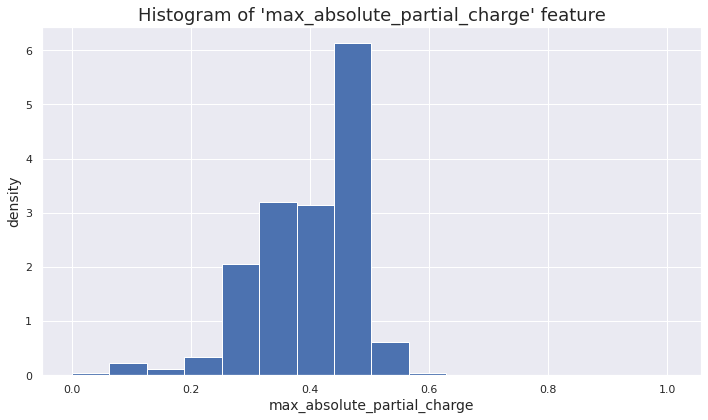

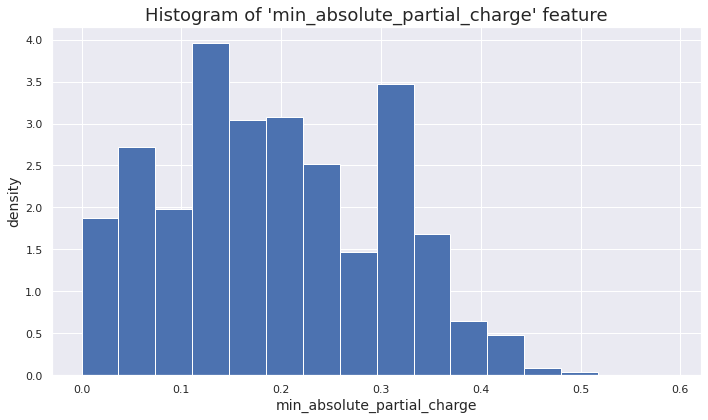

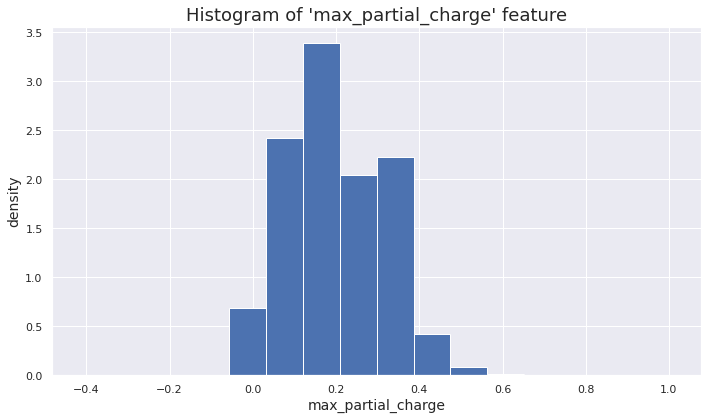

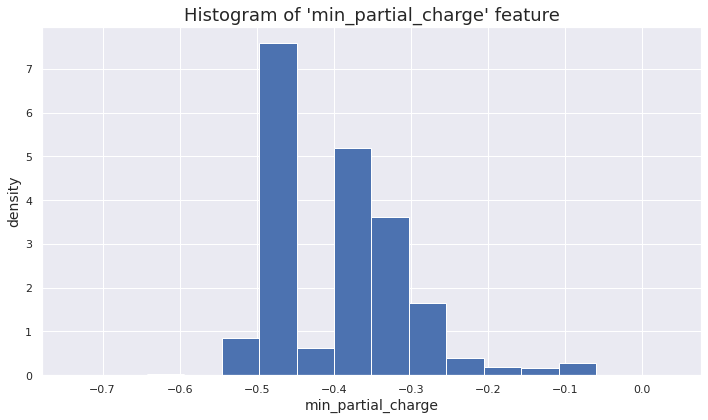

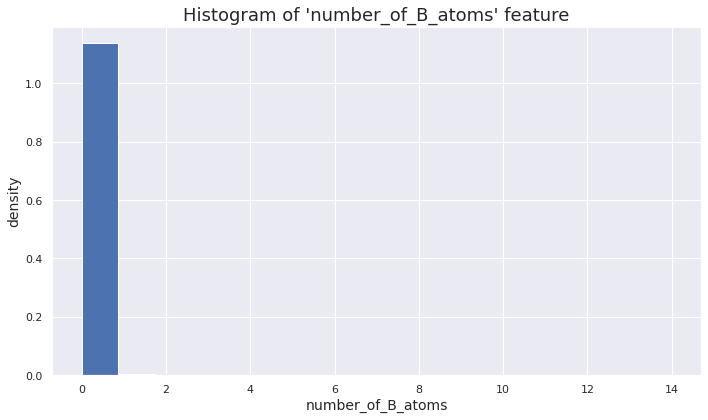

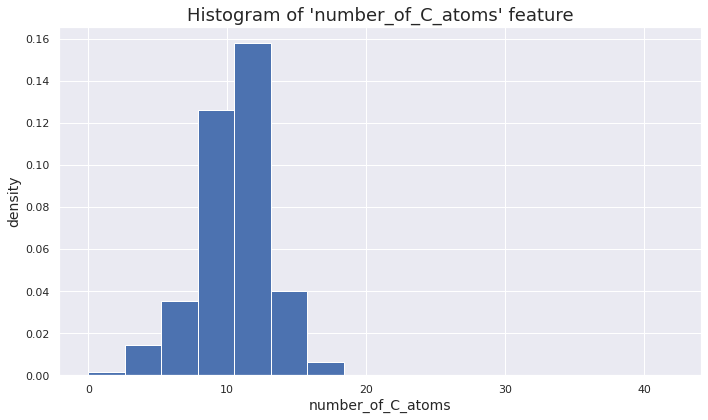

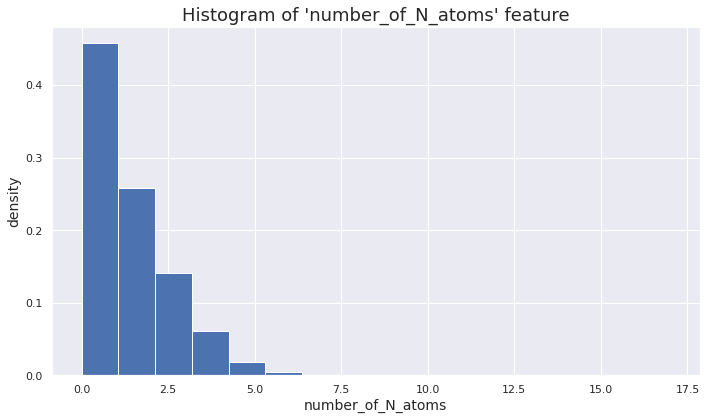

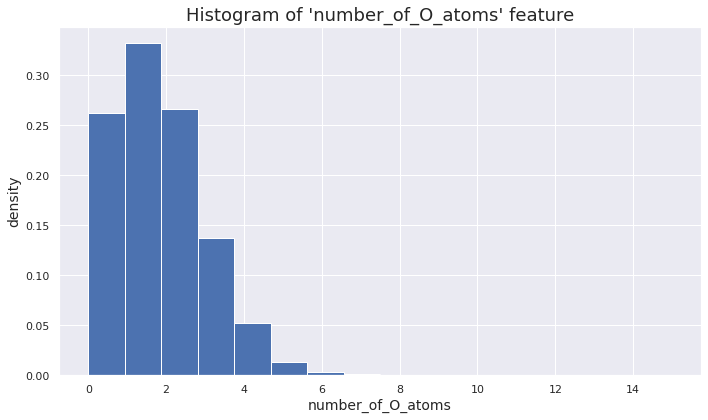

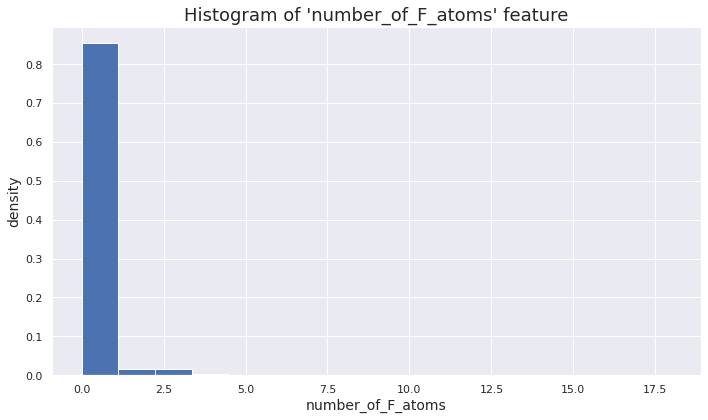

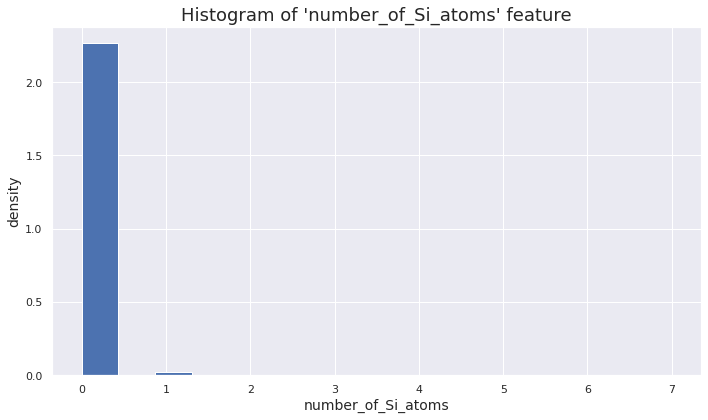

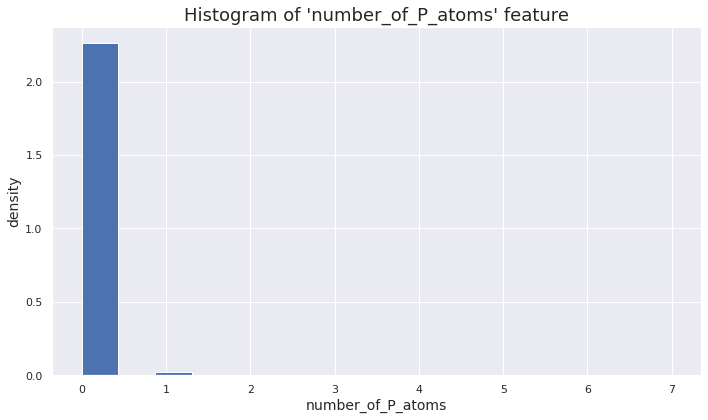

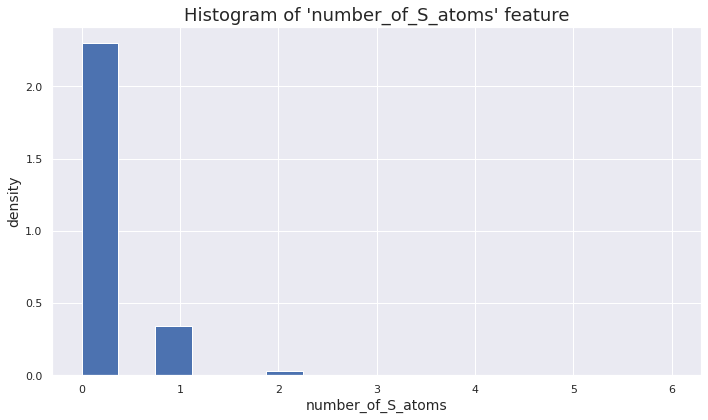

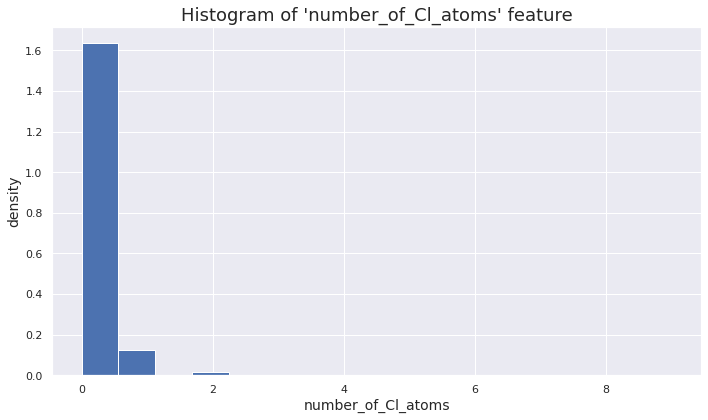

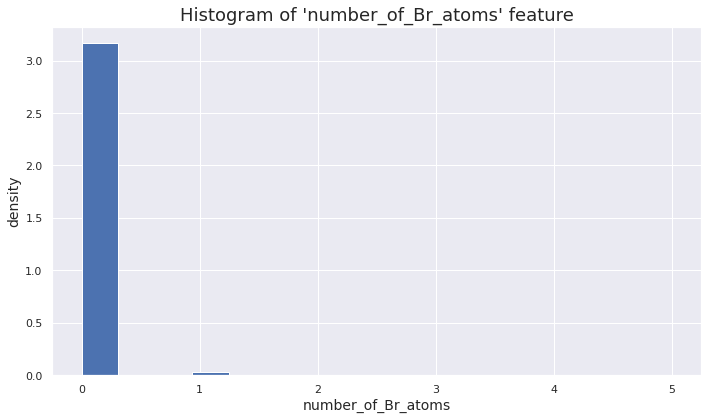

In [13]:
# HISTOGRAMS
for feature in features:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.hist(df[feature], density=True, bins=16)
    ax.set_title(f"Histogram of '{feature}' feature", fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel("density", fontsize=14)
    fig.tight_layout()
    plt.show()

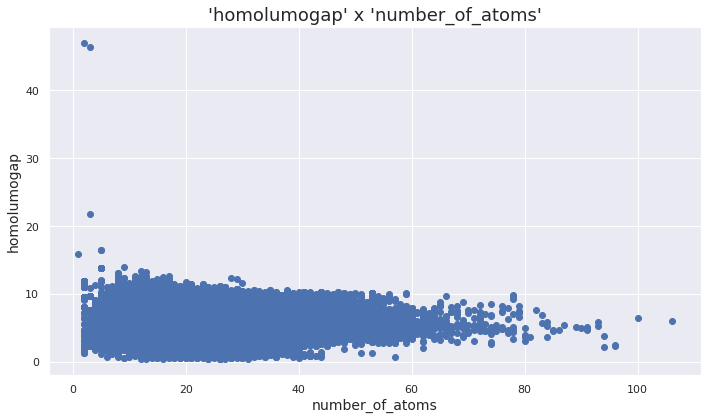

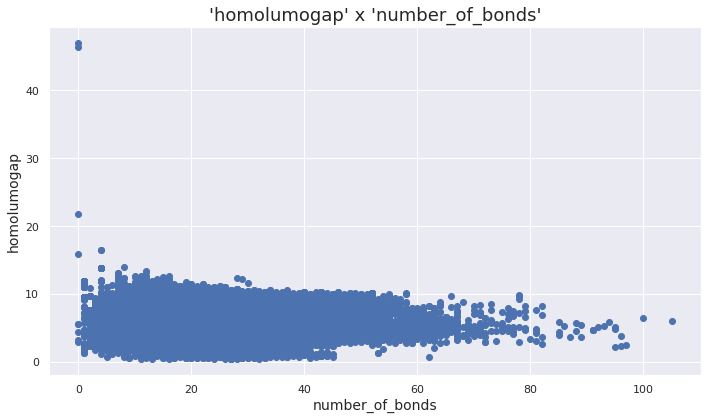

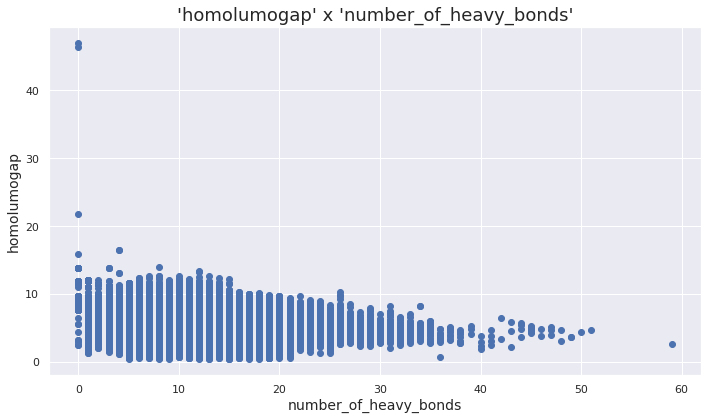

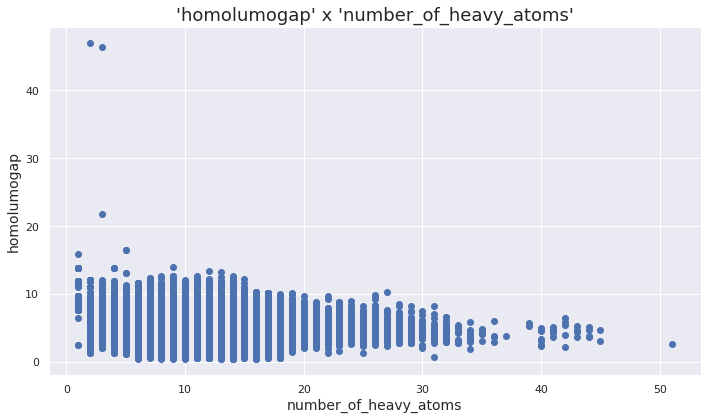

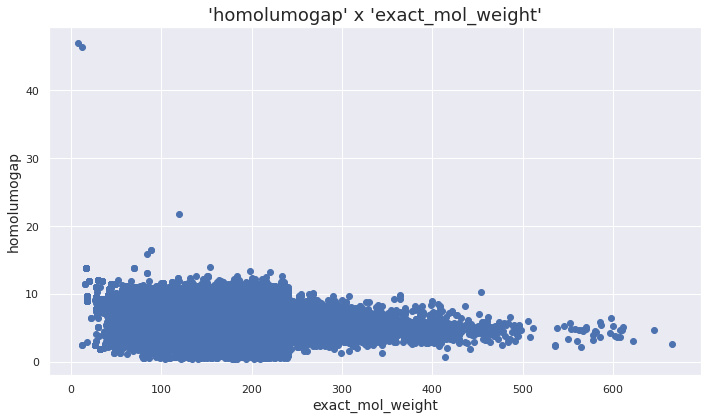

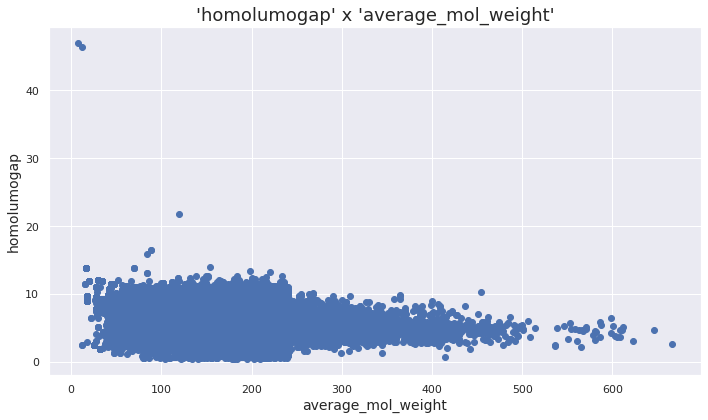

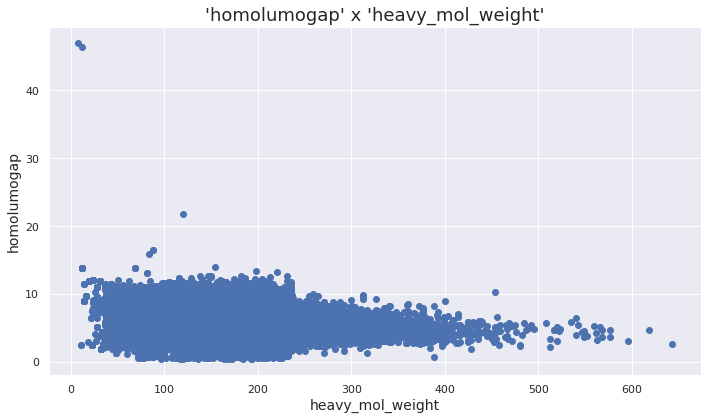

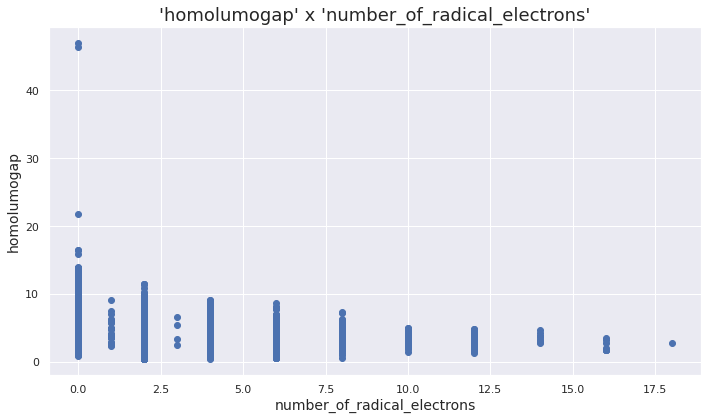

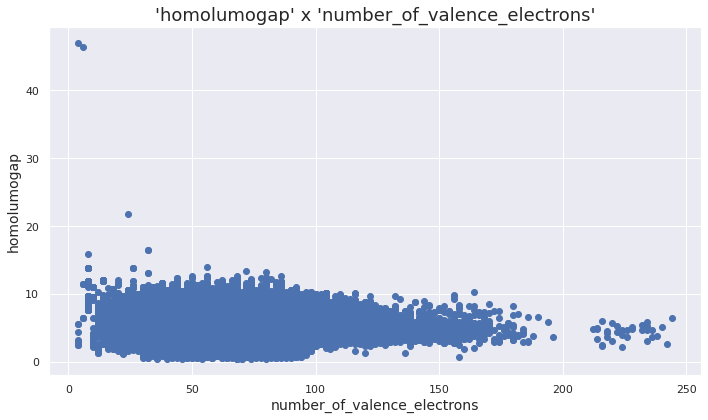

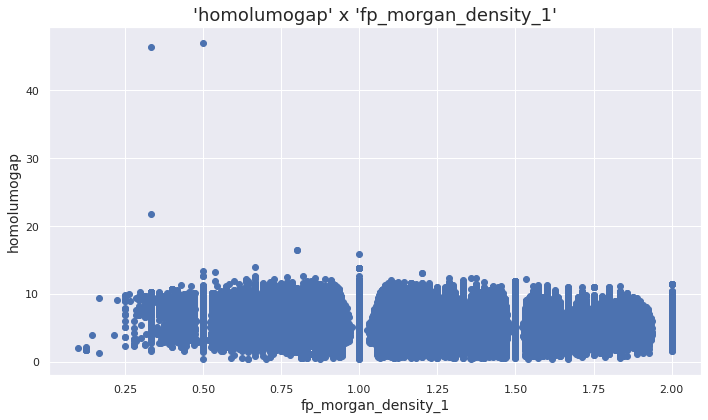

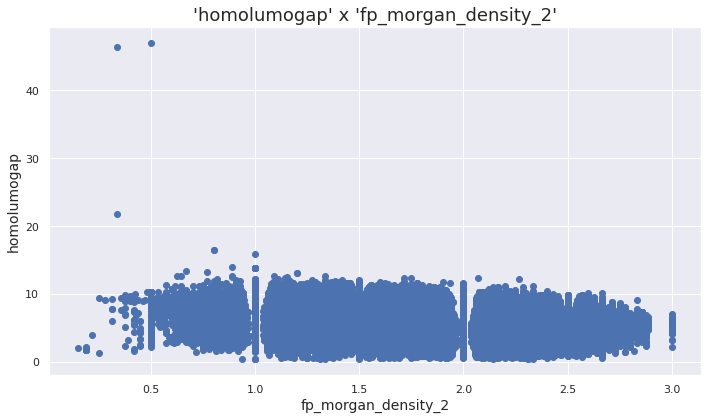

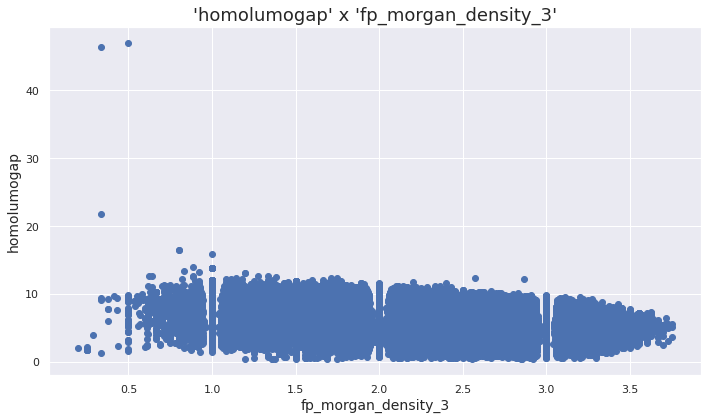

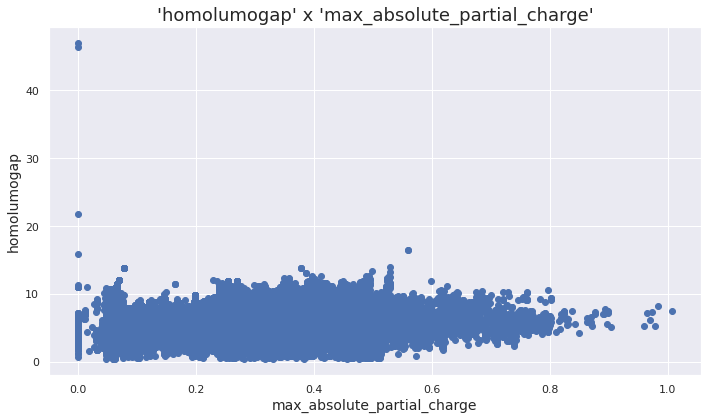

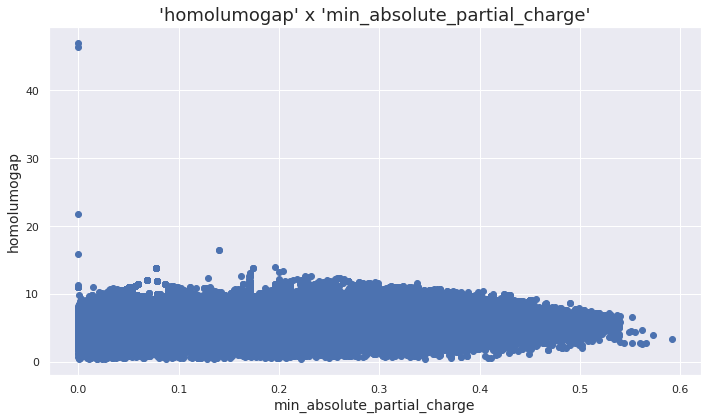

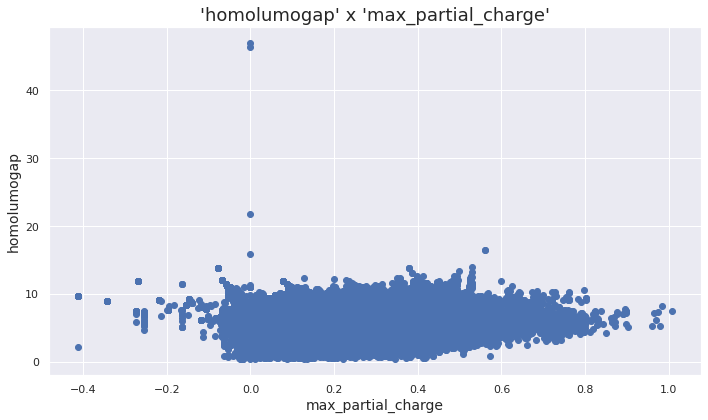

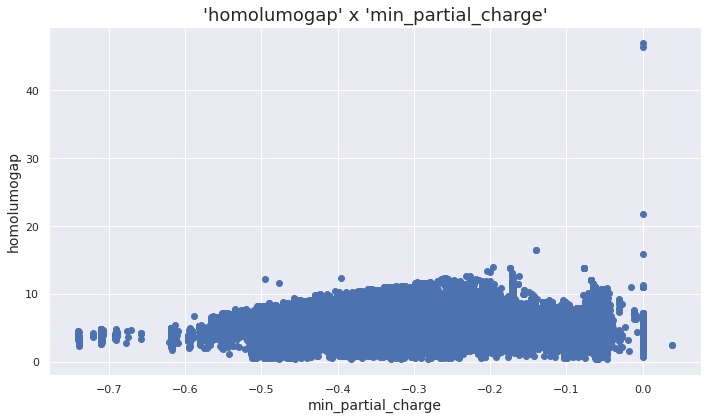

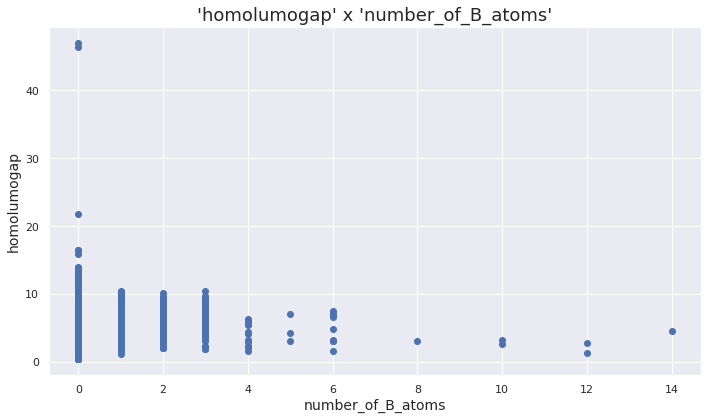

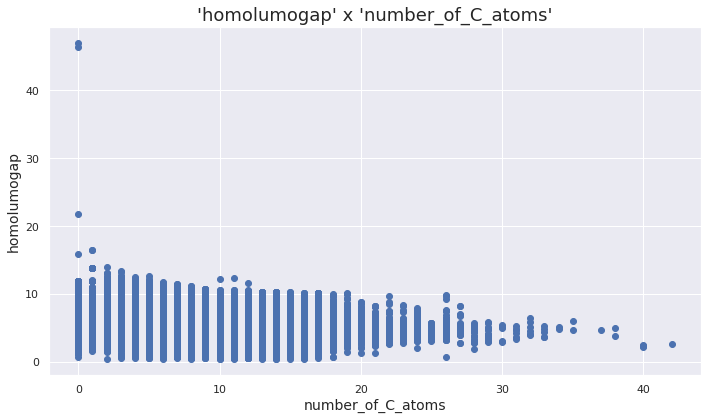

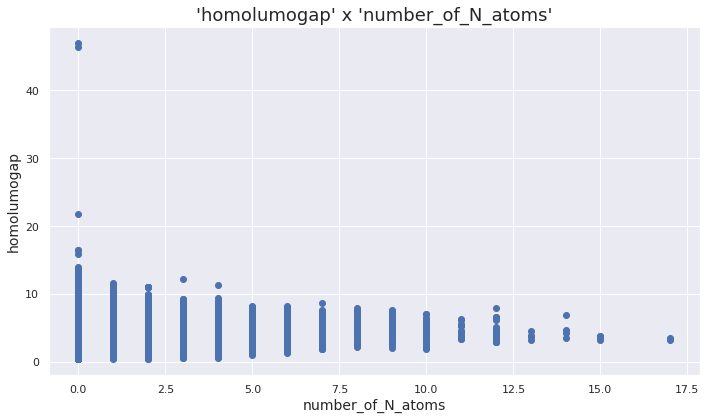

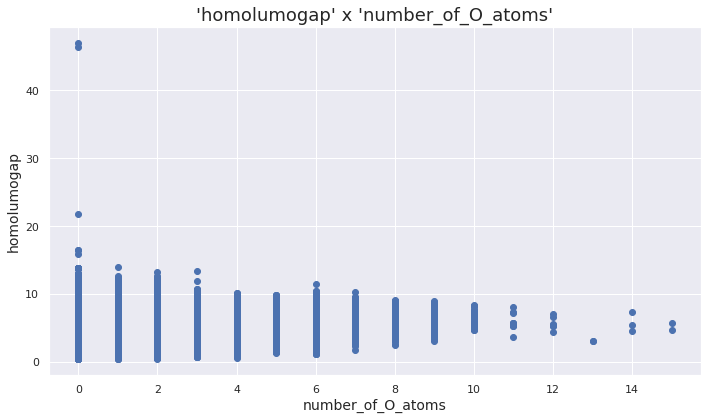

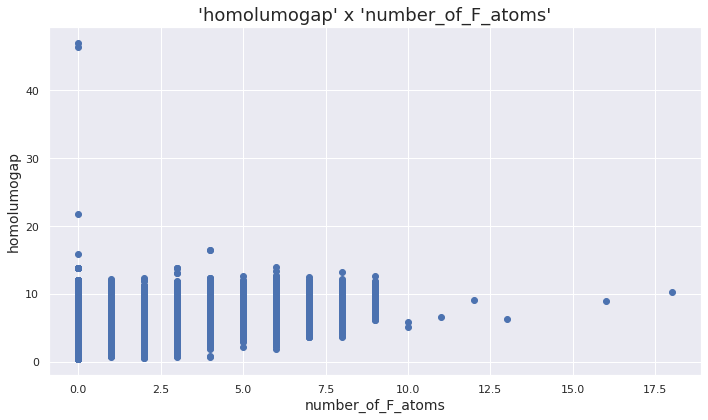

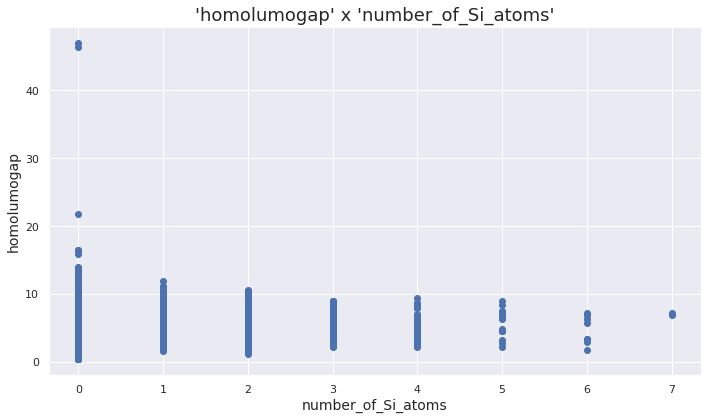

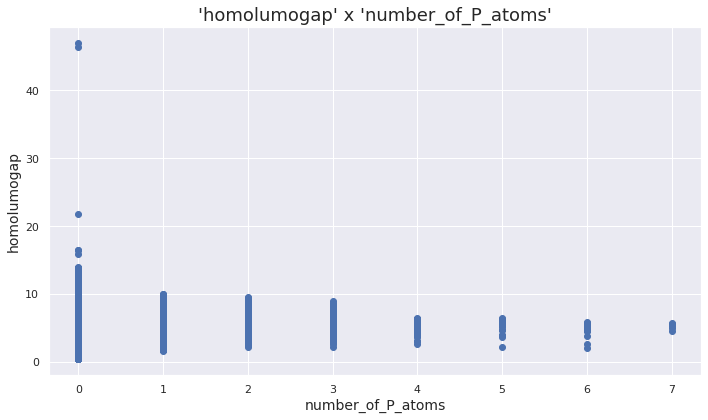

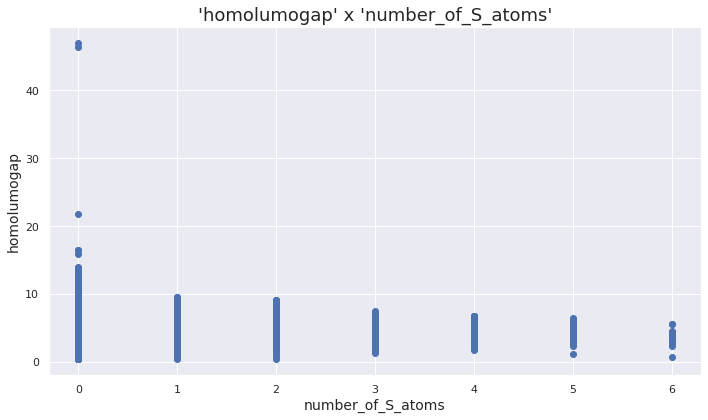

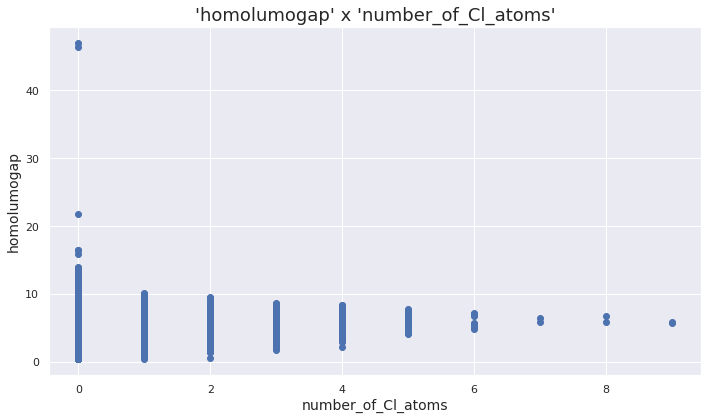

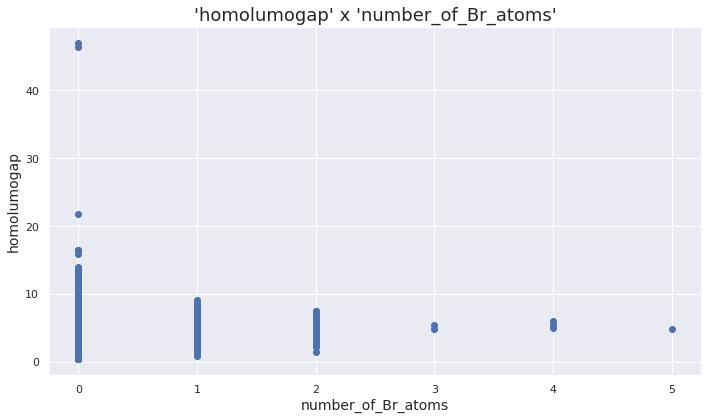

In [14]:
# Scatters
for feature in features:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(df[feature], df[target[0]])
    ax.set_title(f"'{target[0]}' x '{feature}'", fontsize=18)
    ax.set_xlabel(feature, fontsize=14)
    ax.set_ylabel(target[0], fontsize=14)
    fig.tight_layout()
    plt.show()